<a href="https://colab.research.google.com/github/JosePabloGFnl/Tensorflow-Practice/blob/main/NeuralNetworkPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
#variables
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) #we'll use keras to save lines of code
modelo = tf.keras.Sequential([capa])

In [ ]:
#an example on how it works with several layers

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

#the training is faster in this case

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
#training
print("Training in process...")
historial = modelo.fit(celsius, fahrenheit, epochs = 1000, verbose=False)
print("Training completed")

Training in process...
Training completed


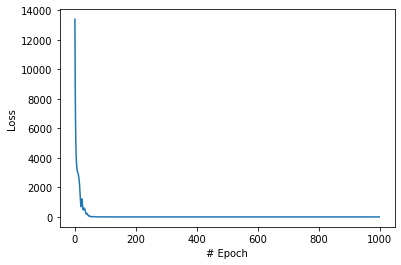

In [ ]:
#loss function

#we're going to see this before predicting
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.plot(historial.history["loss"])

In [ ]:
print("Prediction: ")
#we don't have 100 degrees in our info, so we're going to test with that
resultado = modelo.predict([100.0])
print("Result: " + str(resultado) + " degrees fahrenheit")

Prediction: 
Result: [[211.74742]]degrees fahrenheit


In [ ]:
print("Internal variables in the model: ")
print(capa.get_weights())

#How it works: 100 * 1.798 + 31.9 = 211.74

Internal variables in the model: 
[array([[1.7984012]], dtype=float32), array([31.900372], dtype=float32)]


In [ ]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.01723433,  0.47684628, -0.28183788]], dtype=float32), array([ 1.6040038,  5.260229 , -2.2153916], dtype=float32)]
[array([[-0.42704862,  0.80784637, -1.2420443 ],
       [ 0.07123512,  1.8066207 ,  1.5280346 ],
       [ 1.1315044 , -0.511     ,  0.50083673]], dtype=float32), array([-2.9311388 ,  4.8520703 , -0.08911679], dtype=float32)]
[array([[-0.33707651],
       [ 1.3940325 ],
       [ 0.49165797]], dtype=float32), array([4.2356706], dtype=float32)]
